<a href="https://colab.research.google.com/github/hafidhanif/Final-Project/blob/main/FinalProject_Kelompok2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT

# 1. Memprediksi harga mobil menggunakan analisis regresi melibatkan penggunaan berbagai metode seperti Regresi Linier, Regresi Lasso, Regresi Pohon Keputusan, dan XGBoost. Setiap model regresi harus menjalani validasi silang untuk menentukan model yang paling efektif.

# 2. Sebagai permulaan, analisis data eksplorasi (EDA) dilakukan untuk memahami dataset. Selanjutnya, model Regresi Linier, Regresi Lasso, Regresi Pohon Keputusan, dan XGBoost diterapkan, dan kinerjanya dievaluasi dengan menggunakan teknik validasi silang. Model yang menunjukkan kinerja terbaik dalam hal akurasi dan generalisasi kemudian dipilih.

# 3. Setelah model regresi yang optimal diidentifikasi, model ini dapat diimplementasikan pada situs web untuk menyediakan alat yang mudah bagi pengguna untuk memprediksi harga mobil. Situs web ini akan memanfaatkan model regresi yang dipilih untuk membuat prediksi berdasarkan input pengguna, menawarkan antarmuka yang mudah digunakan untuk estimasi harga mobil.

# # Import Libraries and Data

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import joblib
import math
import warnings
import pickle
# Set warnings to be ignored
warnings.filterwarnings("ignore")

from xgboost import XGBRegressor
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, GridSearchCV, ShuffleSplit
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.svm import SVR

### # Inspection Dataset

In [2]:
df1 = pd.read_csv("https://raw.githubusercontent.com/hafidhanif/Final-Project/main/car_price_prediction.csv")

print("Shape:", df1.shape)
df1.sample(5)

Shape: (19237, 18)


,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
1979,45789962,4701,1282,KIA,Sportage,2007,Jeep,Yes,Diesel,2,58497 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4
4190,45816609,31361,-,LEXUS,CT 200h F SPORT,2012,Hatchback,Yes,Hybrid,1.8,157000 km,4.0,Tiptronic,Front,04-May,Left wheel,Black,10
18011,45642696,18817,609,TOYOTA,Camry,2018,Sedan,Yes,Hybrid,2.5,35058 km,4.0,Automatic,Front,04-May,Left wheel,White,12
7163,45662057,31,490,HONDA,Insight,2011,Hatchback,Yes,Hybrid,1.3,198891 km,4.0,Automatic,Front,04-May,Left wheel,Grey,0
12676,45793641,5331,1095,CHEVROLET,Captiva,2008,Jeep,Yes,Diesel,2,45777 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [3]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

Berikut adalah deskripsi singkat untuk setiap atribut dalam dataset ini:
1. ID: Pengenal untuk setiap entri dalam kumpulan data. Biasanya berupa nilai unik yang ditetapkan untuk setiap catatan.
2. Harga (Kolom Target): Harga mobil, yang merupakan variabel target yang ingin Anda prediksi dalam konteks pembelajaran mesin.
3. Retribusi: Jumlah pajak atau biaya yang dikenakan pada mobil. Hal ini dapat dikaitkan dengan registrasi atau kepemilikan kendaraan.
4. Produsen: Perusahaan atau merek yang memproduksi mobil.
5. Model: Nama model atau sebutan spesifik mobil yang diproduksi oleh produsen.
6. Prod. tahun: Tahun pembuatan atau produksi mobil.
7. Kategori: Kategori atau jenis mobil, yang dapat mencakup sebutan seperti sedan, SUV, coupe, dll.
8. Interior kulit: Indikator biner (ya/tidak) yang menentukan apakah mobil tersebut memiliki interior kulit.
9. Jenis bahan bakar: Jenis bahan bakar yang digunakan mobil, seperti bensin, diesel, hibrida, listrik, dll.
10. Volume mesin: Ukuran mesin mobil, biasanya diukur dalam liter atau sentimeter kubik.
11. Jarak tempuh: Jarak total yang telah ditempuh mobil, biasanya diukur dalam kilometer atau mil.
12. Silinder: Jumlah silinder dalam mesin mobil.
13. Jenis kotak persneling: Jenis transmisi yang dimiliki mobil, seperti otomatis, manual, atau semi-otomatis.
14. Roda penggerak: Konfigurasi roda yang bertanggung jawab untuk menggerakkan mobil (misalnya, penggerak roda depan, penggerak roda belakang, penggerak semua roda).
15. Pintu: Jumlah pintu pada mobil.
16. Roda: Jenis konfigurasi roda, seperti penggerak kiri (LHD) atau penggerak kanan (RHD).
17. Warna: Warna eksterior mobil.
18. Kantung udara: Jumlah kantung udara di dalam mobil, yang merupakan fitur keselamatan yang dirancang untuk melindungi penumpang jika terjadi tabrakan.

In [4]:
df1.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [5]:
# Count the Unique value for each of the columns
df1.nunique()

ID                  18924
Price                2315
Levy                  559
Manufacturer           65
Model                1590
Prod. year             54
Category               11
Leather interior        2
Fuel type               7
Engine volume         107
Mileage              7687
Cylinders              13
Gear box type           4
Drive wheels            3
Doors                   3
Wheel                   2
Color                  16
Airbags                17
dtype: int64

# # Data Cleaning and Preprocessing

In [6]:
# Remove unnecessary Columns and Drop Duplicates
df2 = df1.drop(["ID", "Model"], axis="columns")

# Drop Duplicates
print("Duplicates:", df2.duplicated().sum())
df2.drop_duplicates(inplace=True)

Duplicates: 3530


In [7]:
# Replace the Levy Column with 0 Value
df2['Levy'] = df2['Levy'].replace("-", 0)

# Replace Doors Value
df2['Doors'] = df2['Doors'].replace(">5", np.nan)

In [8]:
# Count the NAN value for each of the columns
df2.isna().sum()

Price                 0
Levy                  0
Manufacturer          0
Prod. year            0
Category              0
Leather interior      0
Fuel type             0
Engine volume         0
Mileage               0
Cylinders             0
Gear box type         0
Drive wheels          0
Doors               124
Wheel                 0
Color                 0
Airbags               0
dtype: int64

In [9]:
# Drop NAN value
df2.dropna(inplace=True)

# # Convert Data Type of a Column

In [10]:
df3 = df2.copy()

# Remove String value from Engine Volume column
df3['Engine volume'] = df3['Engine volume'].apply(lambda x: x.split(" ")[0])
df3['Engine volume'].unique()[:8]

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4'], dtype=object)

In [11]:
# Remove string value from Mileage
df3['Mileage'] = df3['Mileage'].str.replace("km", "")
print("Unique Mileage value:", df3['Mileage'][:5])

# Convert the Wheel column to 1 and 0
df3['Left wheel'] = df3['Wheel'].apply(lambda x: 1 if x == "Left wheel" else 0)
df4 = df3.drop("Wheel", axis="columns")

Unique Mileage value: 0    186005 
1    192000 
2    200000 
3    168966 
4     91901 
Name: Mileage, dtype: object


In [12]:
print("Drive Wheels Unique value:", df4['Drive wheels'].unique())

# Replace the Drive Wheels value
df4['Drive wheels'] = df4['Drive wheels'].str.replace("4x4", "All")

Drive Wheels Unique value: ['4x4' 'Front' 'Rear']


In [13]:
# Replace the Leather Interior and Doors column value

df4['Leather interior'] = df4['Leather interior'].apply(lambda x: 1 if x == "Yes" else 0)
df4['Doors'] = df4['Doors'].apply(lambda x: int(x.split("-")[0]))
df4['Doors'].unique()

array([4, 2])

In [14]:
df4['Four doors'] = df4['Doors'].apply(lambda x: 1 if x == 4 else 0)
df5 = df4.drop("Doors", axis="columns")
df5.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors
0,13328,1399,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,6.0,Automatic,All,Silver,12,1,1
1,16621,1018,CHEVROLET,2011,Jeep,0,Petrol,3,192000,6.0,Tiptronic,All,Black,8,1,1
2,8467,0,HONDA,2006,Hatchback,0,Petrol,1.3,200000,4.0,Variator,Front,Black,2,0,1
3,3607,862,FORD,2011,Jeep,1,Hybrid,2.5,168966,4.0,Automatic,All,White,0,1,1
4,11726,446,HONDA,2014,Hatchback,1,Petrol,1.3,91901,4.0,Automatic,Front,Silver,4,1,1


In [15]:
# Convert the data types
df5['Levy'] = df5['Levy'].apply(lambda x: int(x))
df5['Engine volume'] = df5['Engine volume'].apply(lambda x: float(x))
df5['Mileage'] = df5['Mileage'].apply(lambda x: int(x))
df5['Cylinders'] = df5['Cylinders'].apply(lambda x: int(x))

In [16]:
df6 = df5.copy()
df6.dtypes

Price                 int64
Levy                  int64
Manufacturer         object
Prod. year            int64
Category             object
Leather interior      int64
Fuel type            object
Engine volume       float64
Mileage               int64
Cylinders             int64
Gear box type        object
Drive wheels         object
Color                object
Airbags               int64
Left wheel            int64
Four doors            int64
dtype: object

# # Feature Engineering

In [17]:
df6.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors
0,13328,1399,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,All,Silver,12,1,1
1,16621,1018,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,All,Black,8,1,1
2,8467,0,HONDA,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,Black,2,0,1
3,3607,862,FORD,2011,Jeep,1,Hybrid,2.5,168966,4,Automatic,All,White,0,1,1
4,11726,446,HONDA,2014,Hatchback,1,Petrol,1.3,91901,4,Automatic,Front,Silver,4,1,1


* Convert Unnecessary Manufacturer to Others

In [18]:
manufacturer_cars = df6['Manufacturer'].value_counts()
manufacturer_cars_less_than_100 = manufacturer_cars[manufacturer_cars < 100]
print("Total Manufacturer:", len(manufacturer_cars_less_than_100))

df6['Manufacturer'] = df6['Manufacturer'].apply(lambda x: "OTHERS" if x in manufacturer_cars_less_than_100 else x)
df6['Manufacturer'].value_counts()

Total Manufacturer: 47


Manufacturer
HYUNDAI          3039
TOYOTA           2831
MERCEDES-BENZ    1428
CHEVROLET         965
FORD              939
BMW               913
HONDA             874
OTHERS            846
NISSAN            587
VOLKSWAGEN        552
SSANGYONG         415
LEXUS             415
KIA               409
OPEL              390
MITSUBISHI        287
SUBARU            227
AUDI              191
MAZDA             139
JEEP              136
Name: count, dtype: int64

In [19]:
# Create a new car age column
from datetime import datetime
current_year = datetime.now().year
print("Current Year:", current_year)

df6['Age'] = current_year -  df6['Prod. year']
df6.head()

Current Year: 2024


,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
0,13328,1399,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,All,Silver,12,1,1,14
1,16621,1018,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,All,Black,8,1,1,13
2,8467,0,HONDA,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,Black,2,0,1,18
3,3607,862,FORD,2011,Jeep,1,Hybrid,2.5,168966,4,Automatic,All,White,0,1,1,13
4,11726,446,HONDA,2014,Hatchback,1,Petrol,1.3,91901,4,Automatic,Front,Silver,4,1,1,10


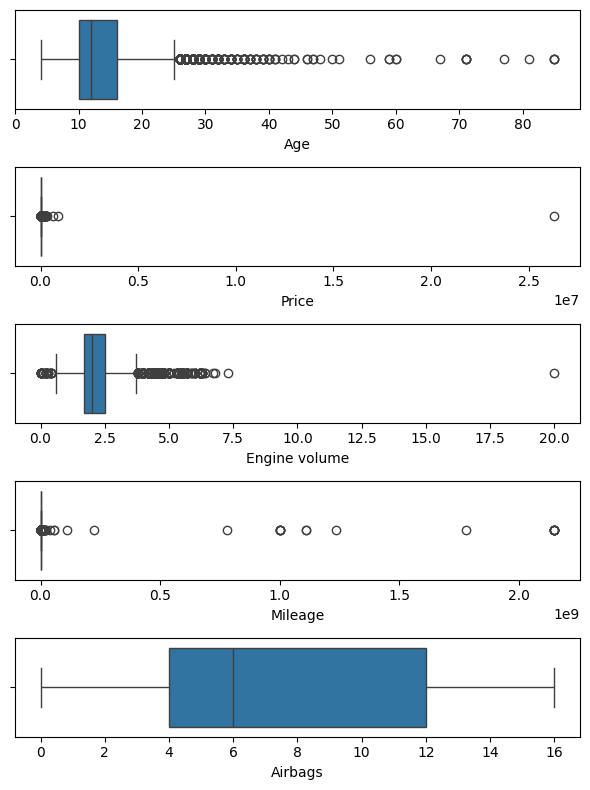

In [20]:
# View outliers using bloxplot
fig, axes = plt.subplots(5, 1, figsize=(6,8))

# Plot boxplots using Seaborn
sns.boxplot(x=df6['Age'], ax=axes[0])
sns.boxplot(x=df6['Price'], ax=axes[1])
sns.boxplot(x=df6['Engine volume'], ax=axes[2])
sns.boxplot(x=df6['Mileage'], ax=axes[3])
sns.boxplot(x=df6['Airbags'], ax=axes[4])

plt.tight_layout()
plt.show()

In [21]:
# Remove Extreme price value
price_condition = df6['Price'] > 400000
result_indices_price = df6.loc[price_condition].index
df6.drop(result_indices_price , inplace=True)

# Remove Extreme Engine Volume Value
engine_volume_condition = df6['Engine volume'] > 10.0
index_number = df6.loc[engine_volume_condition].index
df6.drop(index_number, inplace=True)

# Remove Extreme Mileage Value
mileage_condition = df6['Mileage'] > 1000000
index_number = df6.loc[mileage_condition].index
df6.drop(index_number, inplace=True)

 # # Remove Outliers

In [22]:
# Remove price outliers
price_min_threshold, price_max_threshold = df6['Price'].quantile([0.15, 0.974])
df7 = df6[(df6['Price'] > price_min_threshold) & (df6['Price'] < price_max_threshold)]
display(df7.sort_values(by="Price", ascending=True))
print("df6 Rows:", df6.shape[0])
print("Total Rows Removed:", df6.shape[0] - df7.shape[0])

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
10160,3800,0,OPEL,2001,Hatchback,1,Petrol,2.6,219200,6,Automatic,Front,Black,6,0,1,23
4317,3800,0,OPEL,1994,Sedan,0,Petrol,1.6,270000,4,Manual,Front,Red,2,1,1,30
10665,3800,0,MERCEDES-BENZ,2000,Sedan,1,Diesel,3.2,1000,6,Tiptronic,Rear,Silver,6,1,1,24
3328,3800,0,OPEL,2001,Sedan,0,Petrol,1.0,184592,3,Manual,Front,Blue,4,1,1,23
14458,3800,0,OPEL,1997,Sedan,0,CNG,1.6,0,4,Manual,Front,Green,2,1,1,27
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16926,62408,1811,LEXUS,2010,Jeep,1,Petrol,4.6,133000,8,Tiptronic,All,Silver,10,1,1,14
8406,62493,831,HONDA,2018,Coupe,1,Petrol,1.5,8520,4,Automatic,Front,Red,4,1,1,6
12169,62653,1077,HYUNDAI,2019,Jeep,1,Diesel,2.0,7865,4,Automatic,Front,Brown,4,1,1,5
6329,62697,880,HYUNDAI,2018,Sedan,1,Petrol,1.6,32000,4,Automatic,Front,Grey,4,1,1,6


df6 Rows: 15509
Total Rows Removed: 2755


In [23]:
# Remove Engine volume outliers
ev_min_threshold, ev_max_threshold = df7['Engine volume'].quantile([0.007, 0.99])
df8 = df7[(df7['Engine volume'] > ev_min_threshold) & (df7['Engine volume'] < ev_max_threshold)]
display(df8.sort_values(by="Engine volume", ascending=True))
print("df7 Rows:", df7.shape[0])
print("Total Rows Removed:", df7.shape[0] - df8.shape[0])

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
8163,10976,0,TOYOTA,2008,Hatchback,0,Hybrid,1.1,220800,2,Variator,Front,Blue,4,1,1,16
15474,10976,0,KIA,2008,Hatchback,0,Petrol,1.1,91000,4,Manual,Front,Black,4,1,1,16
14962,9408,0,KIA,2005,Hatchback,0,Petrol,1.1,218000,4,Manual,Front,Black,4,1,1,19
7911,10349,0,OPEL,2008,Hatchback,0,Petrol,1.2,135000,4,Manual,Front,Brown,3,1,1,16
2987,10663,1032,NISSAN,2012,Hatchback,0,Petrol,1.2,181000,4,Automatic,Front,White,4,0,1,12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4566,30734,0,BMW,2008,Jeep,1,Petrol,4.8,230000,12,Tiptronic,All,Black,12,1,1,16
19035,20385,0,BMW,2008,Sedan,1,Petrol,4.8,227000,8,Tiptronic,Rear,Black,8,1,1,16
11837,25089,0,BMW,2008,Sedan,1,Petrol,4.8,150000,8,Tiptronic,Rear,White,12,1,1,16
11103,8938,2195,BMW,2009,Jeep,1,Petrol,4.8,153515,8,Automatic,All,Grey,12,1,1,15


df7 Rows: 12754
Total Rows Removed: 301


In [24]:
# Remove Mileage outliers
Mileage_max_threshold = df7['Mileage'].quantile(0.975)
df9 = df8[(df8['Mileage'] < Mileage_max_threshold)]
display(df9.sort_values(by="Mileage", ascending=False).head())
print("df8 Rows:", df8.shape[0])
print("Total Rows Removed:", df8.shape[0] - df9.shape[0])

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
19093,6586,585,TOYOTA,2013,Sedan,1,Hybrid,1.8,361445,4,Automatic,Front,White,12,1,1,11
6928,9252,781,TOYOTA,2012,Sedan,1,Hybrid,2.5,361035,4,Automatic,Front,Black,12,1,1,12
8696,15200,586,TOYOTA,2012,Hatchback,0,Hybrid,1.8,360755,4,Automatic,Front,Sky blue,12,1,1,12
6335,58018,3505,LEXUS,2015,Jeep,1,Petrol,3.5,360125,6,Tiptronic,All,White,12,0,1,9
16801,10036,1832,MERCEDES-BENZ,2005,Goods wagon,0,Diesel,2.2,360000,4,Manual,Rear,Silver,4,1,1,19


df8 Rows: 12453
Total Rows Removed: 316


In [25]:
# Remove Age outliers
Age_max_threshold = df8['Age'].quantile(0.96)
df10 = df9[(df9['Age'] < Age_max_threshold)]
display(df10.sort_values(by="Age", ascending=False).head())
print("df9 Rows:", df9.shape[0])
print("Total Rows Remove:", df9.shape[0] - df10.shape[0])

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors,Age
4687,13485,0,MERCEDES-BENZ,2000,Sedan,1,Petrol,3.2,25500,4,Automatic,Rear,Black,6,1,1,24
14555,5959,0,VOLKSWAGEN,2000,Sedan,0,Diesel,1.9,0,4,Manual,Front,Silver,4,1,1,24
17798,8154,0,MERCEDES-BENZ,2000,Sedan,1,Diesel,2.7,290000,5,Automatic,Rear,Blue,12,1,1,24
600,7840,0,MERCEDES-BENZ,2000,Sedan,0,Petrol,2.0,136000,4,Tiptronic,Rear,Blue,6,0,1,24
2128,6272,0,SUBARU,2000,Jeep,0,CNG,2.0,200000,4,Automatic,All,White,4,0,1,24


df9 Rows: 12137
Total Rows Remove: 627


In [26]:
df = df10.drop('Age', axis="columns")

# # Exploratory Data Analysis (EDA)

In [27]:
df.head()

,Price,Levy,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Color,Airbags,Left wheel,Four doors
0,13328,1399,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,6,Automatic,All,Silver,12,1,1
1,16621,1018,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,6,Tiptronic,All,Black,8,1,1
2,8467,0,HONDA,2006,Hatchback,0,Petrol,1.3,200000,4,Variator,Front,Black,2,0,1
4,11726,446,HONDA,2014,Hatchback,1,Petrol,1.3,91901,4,Automatic,Front,Silver,4,1,1
5,39493,891,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,4,Automatic,Front,White,4,1,1


In [28]:
manufacturer = df.groupby('Manufacturer')
manufacturer['Manufacturer'].value_counts().sort_values(ascending=False)

Manufacturer
HYUNDAI          2527
TOYOTA           2184
MERCEDES-BENZ     818
CHEVROLET         781
HONDA             682
FORD              656
BMW               641
OTHERS            509
NISSAN            443
SSANGYONG         413
VOLKSWAGEN        387
KIA               337
LEXUS             243
MITSUBISHI        192
OPEL              190
SUBARU            176
AUDI              122
JEEP              108
MAZDA             101
Name: count, dtype: int64

In [29]:
df.describe()

,Price,Levy,Prod. year,Leather interior,Engine volume,Mileage,Cylinders,Airbags,Left wheel,Four doors
count,11510.00000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000,11510.000000
mean,20267.17298,556.036838,2011.279583,0.661772,2.136968,123807.962207,4.383058,6.340313,0.904344,0.961338
std,12211.00072,491.597912,4.426285,0.473127,0.655949,73491.450180,0.990269,3.743050,0.294132,0.192797
min,3800.00000,0.000000,2000.000000,0.000000,1.100000,0.000000,1.000000,0.000000,0.000000,0.000000
25%,11403.00000,0.000000,2009.000000,0.000000,1.600000,69252.750000,4.000000,4.000000,1.000000,1.000000
50%,17249.00000,639.000000,2012.000000,1.000000,2.000000,118400.000000,4.000000,4.000000,1.000000,1.000000
75%,25089.00000,836.000000,2014.000000,1.000000,2.500000,169000.000000,4.000000,10.000000,1.000000,1.000000
max,62719.00000,7536.000000,2020.000000,1.000000,4.800000,361445.000000,16.000000,16.000000,1.000000,1.000000


In [30]:
# sns.pairplot(df)

correlation = df.select_dtypes(exclude="object").corr()
correlation['Price']

Price               1.000000
Levy                0.156967
Prod. year          0.488154
Leather interior    0.286973
Engine volume       0.187803
Mileage            -0.220853
Cylinders           0.061317
Airbags             0.028697
Left wheel          0.265832
Four doors          0.044941
Name: Price, dtype: float64

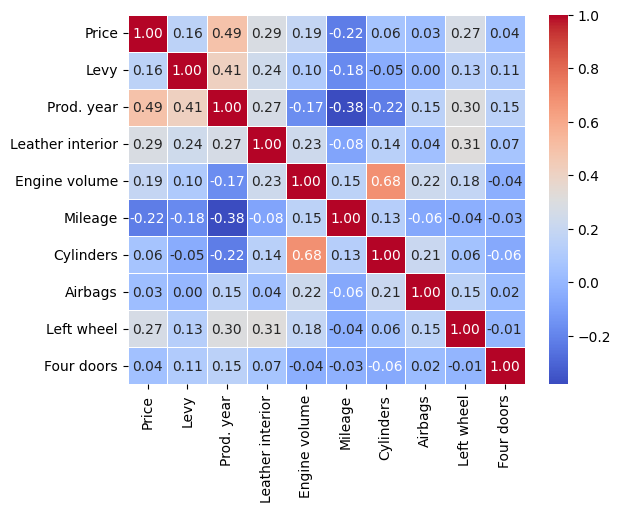

In [31]:
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.show()

* (Eng) Weak Correlation (Close to 0): 'Cylinders,' 'Airbags,' 'Four doors,' and 'Levy' have relatively weak correlations with 'Price.' </br> For this reason remove this value from our dataset.

* (IDN) (Korelasi Lemah (Mendekati 0): 'Silinder,' 'Airbag,' 'Empat pintu,' dan 'Retribusi' memiliki korelasi yang relatif lemah dengan 'Harga. </br> Untuk alasan ini, hapus nilai ini dari kumpulan data kami).

In [32]:
df = df.drop(['Cylinders', 'Airbags', 'Four doors', 'Levy'], axis="columns")
df.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Color,Left wheel
0,13328,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,Automatic,All,Silver,1
1,16621,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,Tiptronic,All,Black,1
2,8467,HONDA,2006,Hatchback,0,Petrol,1.3,200000,Variator,Front,Black,0
4,11726,HONDA,2014,Hatchback,1,Petrol,1.3,91901,Automatic,Front,Silver,1
5,39493,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,Automatic,Front,White,1


# # Visualization

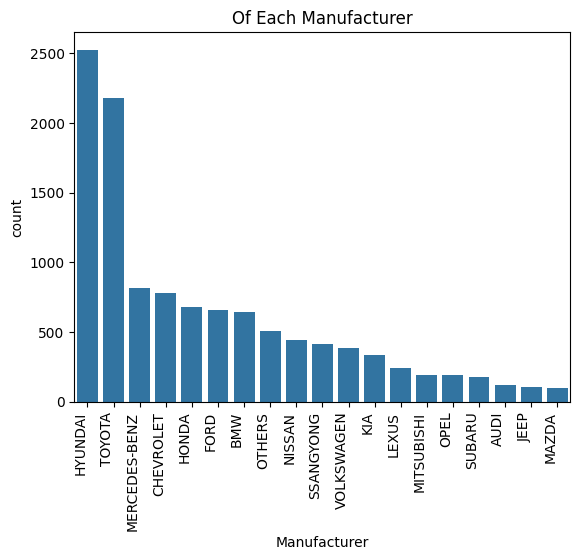

In [33]:
# Of Each Manufacturer
sns.countplot(data=df, x="Manufacturer", order=df['Manufacturer'].value_counts().index)
plt.xticks(rotation=90, ha="right")
plt.title("Of Each Manufacturer")
plt.show()

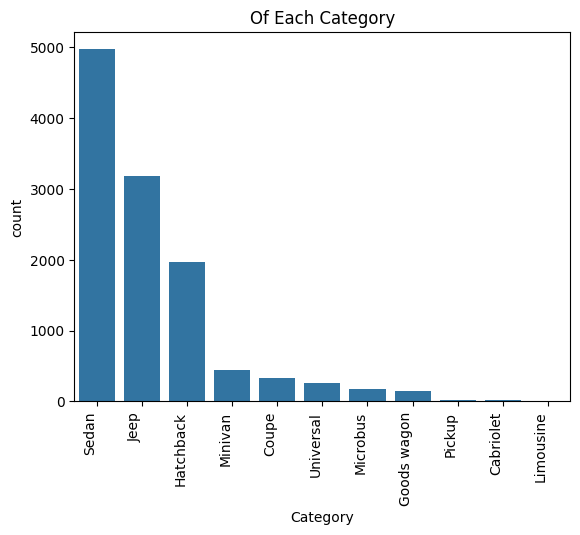

In [34]:
# Of Each Category
sns.countplot(data=df, x="Category", order=df['Category'].value_counts().index)
plt.xticks(rotation=90, ha="right")
plt.title("Of Each Category")
plt.show()

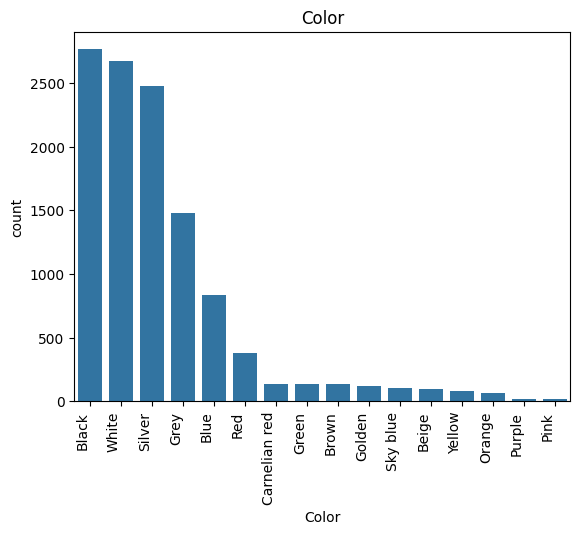

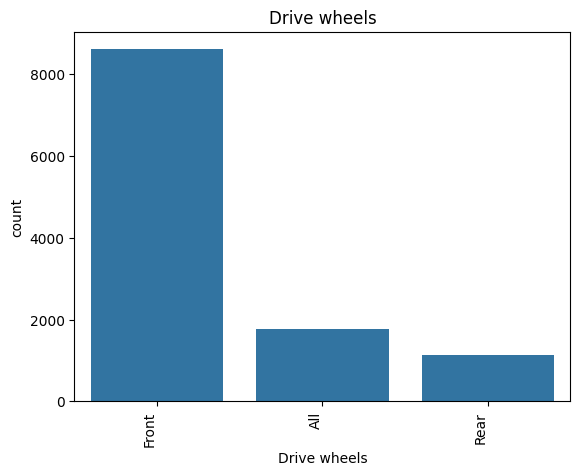

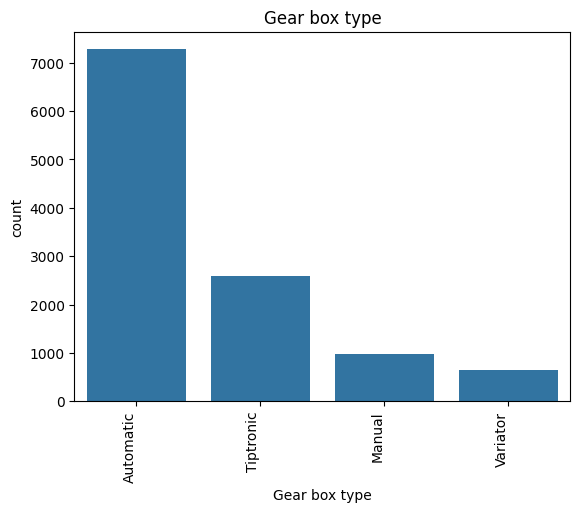

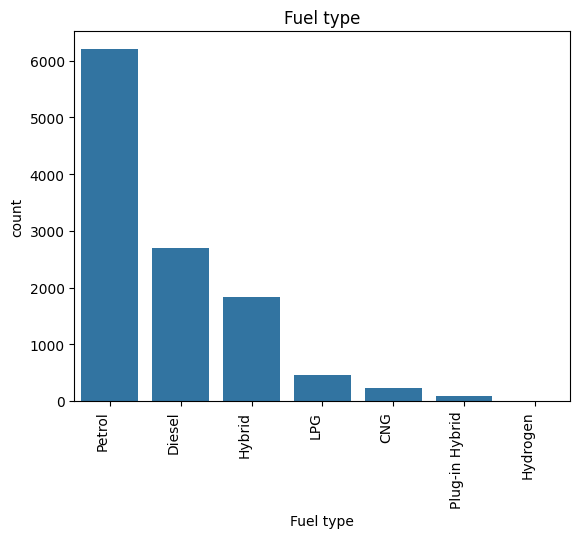

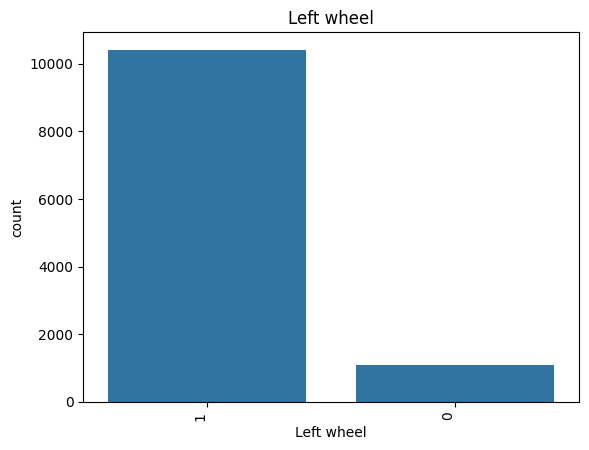

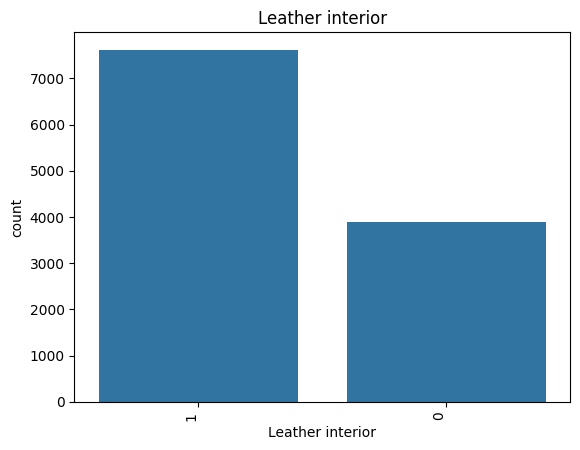

In [35]:
columns = ['Color', 'Drive wheels', 'Gear box type', 'Fuel type', 'Left wheel', 'Leather interior']
for column in columns:
    sns.countplot(data=df, x=column, order=df[column].value_counts().index)
    plt.xticks(rotation=90, ha="right")
    plt.title(column)
    plt.show()

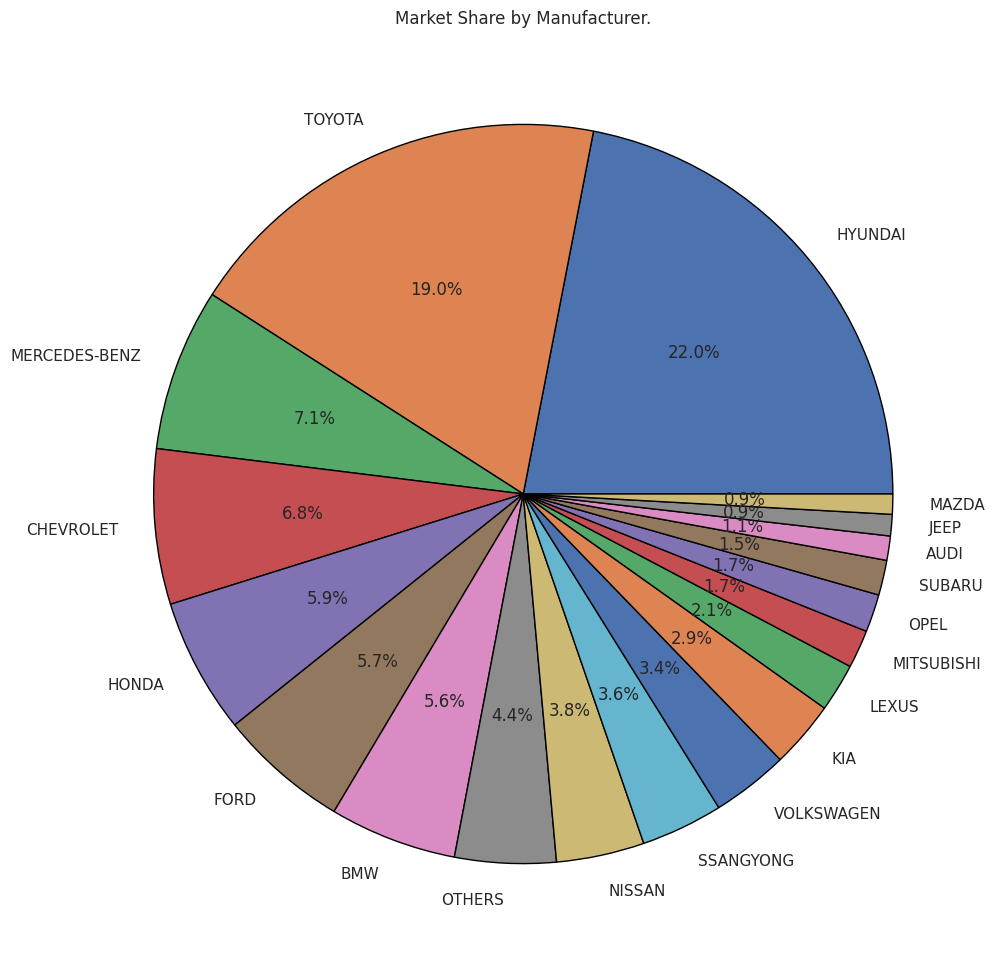

In [36]:
manufacturer_counts = df['Manufacturer'].value_counts()

# Draw a Pieplot
plt.figure(figsize=(12, 12))
sns.set(style="dark")

manufacturer_counts.plot.pie(autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'})
plt.title('Market Share by Manufacturer.')
plt.ylabel('')  # Remove y-axis label
plt.show()

# # Transform Data

In [37]:
X = df.drop("Price", axis="columns")
y = df['Price']
y[:10]

0     13328
1     16621
2      8467
4     11726
5     39493
9     26657
14    59464
16     7683
17    28382
20    18826
Name: Price, dtype: int64

In [38]:
X.head()

,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Color,Left wheel
0,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,Automatic,All,Silver,1
1,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,Tiptronic,All,Black,1
2,HONDA,2006,Hatchback,0,Petrol,1.3,200000,Variator,Front,Black,0
4,HONDA,2014,Hatchback,1,Petrol,1.3,91901,Automatic,Front,Silver,1
5,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,Automatic,Front,White,1


* Normalization Mileage and Engine volume data (Normalisasi Data jarak tempuh dan volume mesin)

In [39]:
scaler = MinMaxScaler()

In [40]:
print("Minimum Engine volume value:", X['Engine volume'].min())
print("Maximum Engine volume value:", X['Engine volume'].max())

X['Engine volume_scaled'] = scaler.fit_transform(X[['Engine volume']])

Minimum Engine volume value: 1.1
Maximum Engine volume value: 4.8


In [41]:
print("Minimum Mileage value:", X['Mileage'].min())
print("Maximum Mileage value:", X['Mileage'].max())

X['Mileage_scaled'] = scaler.fit_transform(X[['Mileage']])
X.head()

Minimum Mileage value: 0
Maximum Mileage value: 361445


,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Color,Left wheel,Engine volume_scaled,Mileage_scaled
0,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,Automatic,All,Silver,1,0.648649,0.514615
1,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,Tiptronic,All,Black,1,0.513514,0.531201
2,HONDA,2006,Hatchback,0,Petrol,1.3,200000,Variator,Front,Black,0,0.054054,0.553335
4,HONDA,2014,Hatchback,1,Petrol,1.3,91901,Automatic,Front,Silver,1,0.054054,0.254260
5,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,Automatic,Front,White,1,0.243243,0.445243


In [42]:
# Save Categorical data
category_columns_data = {
    'Manufacturer': [a for a in X['Manufacturer'].unique()],
    'Category': [b for b in X['Category'].unique()],
    'Fuel_type': [c for c in X['Fuel type'].unique()],
    'Gear_box_type': [d for d in X['Gear box type'].unique()],
    'Drive_wheels': [e for e in X['Drive wheels'].unique()],
    'Color': [d for d in X['Color'].unique()]
}

with open("category_columns_data.json", "w") as f:
    f.write(json.dumps(category_columns_data))

# # Create Dummies variables

In [43]:
# Dummy variable for Manufacturer
Manufacturer = pd.get_dummies(X['Manufacturer'], drop_first=True)
Manufacturer = Manufacturer.astype(int)

# Dummy variable for Category
Category = pd.get_dummies(X['Category'], drop_first=True)
Category = Category.astype(int)

# Dummy variable for Fuel_type
Fuel_type = pd.get_dummies(X['Fuel type'], drop_first=True)
Fuel_type = Fuel_type.astype(int)

# Dummy variable for Fuel_type
Gear_box_type = pd.get_dummies(X['Gear box type'], drop_first=True)
Gear_box_type = Gear_box_type.astype(int)

# Dummy variable for Fuel_type
Drive_wheels = pd.get_dummies(X['Drive wheels'], drop_first=True)
Drive_wheels = Drive_wheels.astype(int)

# Dummy variable for Color
Color = pd.get_dummies(X['Color'], drop_first=True)
Color = Color.astype(int)

In [44]:
pd.set_option("display.max_columns", None)

In [45]:
X = pd.concat([X, Category, Fuel_type, Gear_box_type, Drive_wheels, Color, Manufacturer], axis="columns")

X = X.drop(['Manufacturer', 'Category', 'Fuel type', 'Gear box type', 'Drive wheels', 'Color', 'Engine volume', 'Mileage'], axis="columns")
X.head()

,Prod. year,Leather interior,Left wheel,Engine volume_scaled,Mileage_scaled,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid,Manual,Tiptronic,Variator,Front,Rear,Black,Blue,Brown,Carnelian red,Golden,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow,BMW,CHEVROLET,FORD,HONDA,HYUNDAI,JEEP,KIA,LEXUS,MAZDA,MERCEDES-BENZ,MITSUBISHI,NISSAN,OPEL,OTHERS,SSANGYONG,SUBARU,TOYOTA,VOLKSWAGEN
0,2010,1,1,0.648649,0.514615,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1,2011,0,1,0.513514,0.531201,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,2006,0,0,0.054054,0.553335,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,2014,1,1,0.054054,0.254260,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2016,1,1,0.243243,0.445243,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [46]:
# Save Columns information
columns = {
    'data_columns': [column for column in X.columns]
}
with open("columns.json", "w") as f:
    f.write(json.dumps(columns))

In [47]:
# Tain Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

print("X Train Shape:", X_train.shape)
print("X Test Shape:", X_test.shape)

X Train Shape: (9208, 59)
X Test Shape: (2302, 59)


# # Model Building

In [48]:
X_train.head()

,Prod. year,Leather interior,Left wheel,Engine volume_scaled,Mileage_scaled,Coupe,Goods wagon,Hatchback,Jeep,Limousine,Microbus,Minivan,Pickup,Sedan,Universal,Diesel,Hybrid,Hydrogen,LPG,Petrol,Plug-in Hybrid,Manual,Tiptronic,Variator,Front,Rear,Black,Blue,Brown,Carnelian red,Golden,Green,Grey,Orange,Pink,Purple,Red,Silver,Sky blue,White,Yellow,BMW,CHEVROLET,FORD,HONDA,HYUNDAI,JEEP,KIA,LEXUS,MAZDA,MERCEDES-BENZ,MITSUBISHI,NISSAN,OPEL,OTHERS,SSANGYONG,SUBARU,TOYOTA,VOLKSWAGEN
7601,2014,1,1,0.243243,0.425888,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
18711,2000,1,1,0.891892,0.541255,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
11965,2003,0,1,0.972973,0.403934,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
3238,2008,1,1,0.108108,0.796802,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
12657,2014,1,1,0.135135,0.141100,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0


# # Cross Validation

In [50]:
model_params = {
    "Linear_Regression": {
        "model": LinearRegression(),
        "params": {
            "fit_intercept": [True, False]
        }
    },
    "Lasso": {
        "model": Lasso(),
        "params": {
            "alpha": [1,2,3],
            "selection": ['random', 'cyclic']
        }
    },
    "Decision_Tree": {
        "model": DecisionTreeRegressor(),
        "params": {
            "splitter": ['best', 'random']
        }
    },
    "Random_forest_regressor": {
        "model": RandomForestRegressor(),
        "params": {
                'n_estimators': [ 50 , 400],
                'min_samples_split': [5,6]
        }
    },
    "XGBoost": {
        "model": XGBRegressor(),
        "params":{
            'n_estimators': [100, 400, 500],
            'learning_rate': [0.04],
            'max_depth': [6, 7, 8],
            'gamma': [0.0005, 0.001, 0.005]
        }
    }
}

# model_df =  Find_the_best_model(X, y, model_params)
# model_df

In [49]:
# Cross Validation with Grid Searh CV
def Find_the_best_model(X, y, model_params):
    scores = []

    for algo_name, mp in model_params.items():
        Cv = ShuffleSplit(n_splits=5, test_size=0.20, random_state=0)
        clf = GridSearchCV(mp['model'], mp['params'], cv=Cv, return_train_score = False)
        clf.fit(X, y)
        scores.append({
            "Model": algo_name,
            "Best_score": clf.best_score_,
            "Best_params": clf.best_params_
        })

    return pd.DataFrame(scores, columns=["Model", "Best_score", "Best_params"])

* Conclusion: XGBoost Gives the best score. Parameters: {'gamma': 0.001, 'learning_rate': 0.04, 'max_depth': 8, 'n_estimators': 400}
(Kesimpulan: XGBoost Memberikan skor terbaik. Parameter: {'gamma': 0.001, 'learning_rate': 0.04, 'max_depth': 8, 'n_estimator': 400})

# # XGBoost Model

In [51]:
xgb_model = XGBRegressor(
    gamma= 0.001,
    learning_rate= 0.4,
    max_depth= 7,
    n_estimators= 400
)
xgb_model.fit(X_train, y_train)

y_pred = xgb_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)

print("Mean Squared Error:", mse)
print("Mean Absolute Error:", mae)
print("Root Mearn Squared Error:", math.sqrt(mse))

Mean Squared Error: 59024429.47019621
Mean Absolute Error: 5122.424045539545
Root Mearn Squared Error: 7682.73580635155


* Comment: The Mean Squared Error, Root mean squared error and Mean Absolute Error exhibit comparatively higher values.
* (Komentar: Kesalahan Kuadrat Rata-rata, kesalahan kuadrat rata-rata dan Kesalahan Absolut Rata-rata menunjukkan nilai yang relatif lebih tinggi).

In [52]:
# Save this model into joblib file
joblib.dump(xgb_model, 'car_price_model.joblib')

['car_price_model.joblib']

In [53]:
['car_price_model.joblib']

['car_price_model.joblib']

# # Car Price Prediction

In [54]:
def Predict_price(manufacturer, production_year, category, leather_interior, fuel_type, engine_volume, mileage, gear_box_type, drive_wheels, color, left_wheel):
    x = np.zeros(len(X.columns))
    x[0] = production_year
    x[1] = leather_interior
    x[2] = left_wheel
    x[3] = (( engine_volume - 1.1 )/(4.8 - 1.1)) # Engine volume (min, max) = (1.1, 4.8)
    x[4] = (( mileage - 0)/(361445 - 0)) # Mileage (min, max) = (0, 361445)


    category_columns = [manufacturer, category, fuel_type, gear_box_type, drive_wheels, color]
    for i in category_columns:
        try:
            index = np.where(X.columns == i)[0][0]
            if index >= 5:
                x[index] = 1
        except:
            continue

    price = xgb_model.predict([x])
    return price[0]

In [55]:
df.head()

,Price,Manufacturer,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Gear box type,Drive wheels,Color,Left wheel
0,13328,LEXUS,2010,Jeep,1,Hybrid,3.5,186005,Automatic,All,Silver,1
1,16621,CHEVROLET,2011,Jeep,0,Petrol,3.0,192000,Tiptronic,All,Black,1
2,8467,HONDA,2006,Hatchback,0,Petrol,1.3,200000,Variator,Front,Black,0
4,11726,HONDA,2014,Hatchback,1,Petrol,1.3,91901,Automatic,Front,Silver,1
5,39493,HYUNDAI,2016,Jeep,1,Diesel,2.0,160931,Automatic,Front,White,1


In [56]:
# Predict Car Price 1

manufacturer = "LEXUS"
production_year = 2010
category = "Jeep"
leather_interior = 1   # True= 1 and False= 0
fuel_type = "Hybrid"
engine_volume = 3.5
mileage = 186005
gear_box_type = "Automatic"
drive_wheels = "All"
color = "Silver"
left_wheel = 1   # True= 1 and False= 0

Predict_price(manufacturer, production_year, category, leather_interior, fuel_type, engine_volume, mileage, gear_box_type, drive_wheels, color, left_wheel)

13890.304

* Predict Price is: 13890 USD
(Prediksi Harga: 13890 USD)

In [57]:
# Predict 2024 Merchedes Benz Sedan Car Price

manufacturer = "MERCEDES-BENZ"
production_year = 2024
category = "Sedan"
leather_interior = 1   # True= 1 and False= 0
fuel_type = "Hybrid"
engine_volume = 2.0
mileage = 0
gear_box_type = "Automatic"
drive_wheels = "Rear"
color = "Blue"
left_wheel = 0   # True= 1 and False= 0

Predict_price(manufacturer, production_year, category, leather_interior, fuel_type, engine_volume, mileage, gear_box_type, drive_wheels, color, left_wheel)

48074.01

* Behold the remarkable precision of our model! It confidently predicted the price of the Mercedes Benz C-Class Sedan to be USD 48,074, astonishingly close to the actual current price of USD 48,100. Witness the impressive accuracy of our predictions in capturing the essence of market values.

* (Lihatlah ketepatan yang luar biasa dari model kami! Model ini dengan percaya diri memprediksi harga Mercedes Benz C-Class Sedan sebesar USD 48.074, sangat dekat dengan harga aktual saat ini, yaitu USD 48.100. Saksikan keakuratan prediksi kami yang mengesankan dalam menangkap esensi nilai pasar).

TESTING MODEL

In [61]:
pickle.dump(xgb_model, open('model_grad.pkl', 'wb'))